# Importing data 

In [1]:
# Importing important libraries that will be used 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data from the CSV file and displaying the first 5 rows
dataset = pd.read_csv("walmart-sales-dataset-of-45stores.csv")
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Displaying data 

In [3]:
# Printing a summary of the dataset's information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# Generate descriptive statistics for the dataset
dataset.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
# Printing the number of unique values in each column in the data
dataset.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

# Visualizing quantitative variables distributions 

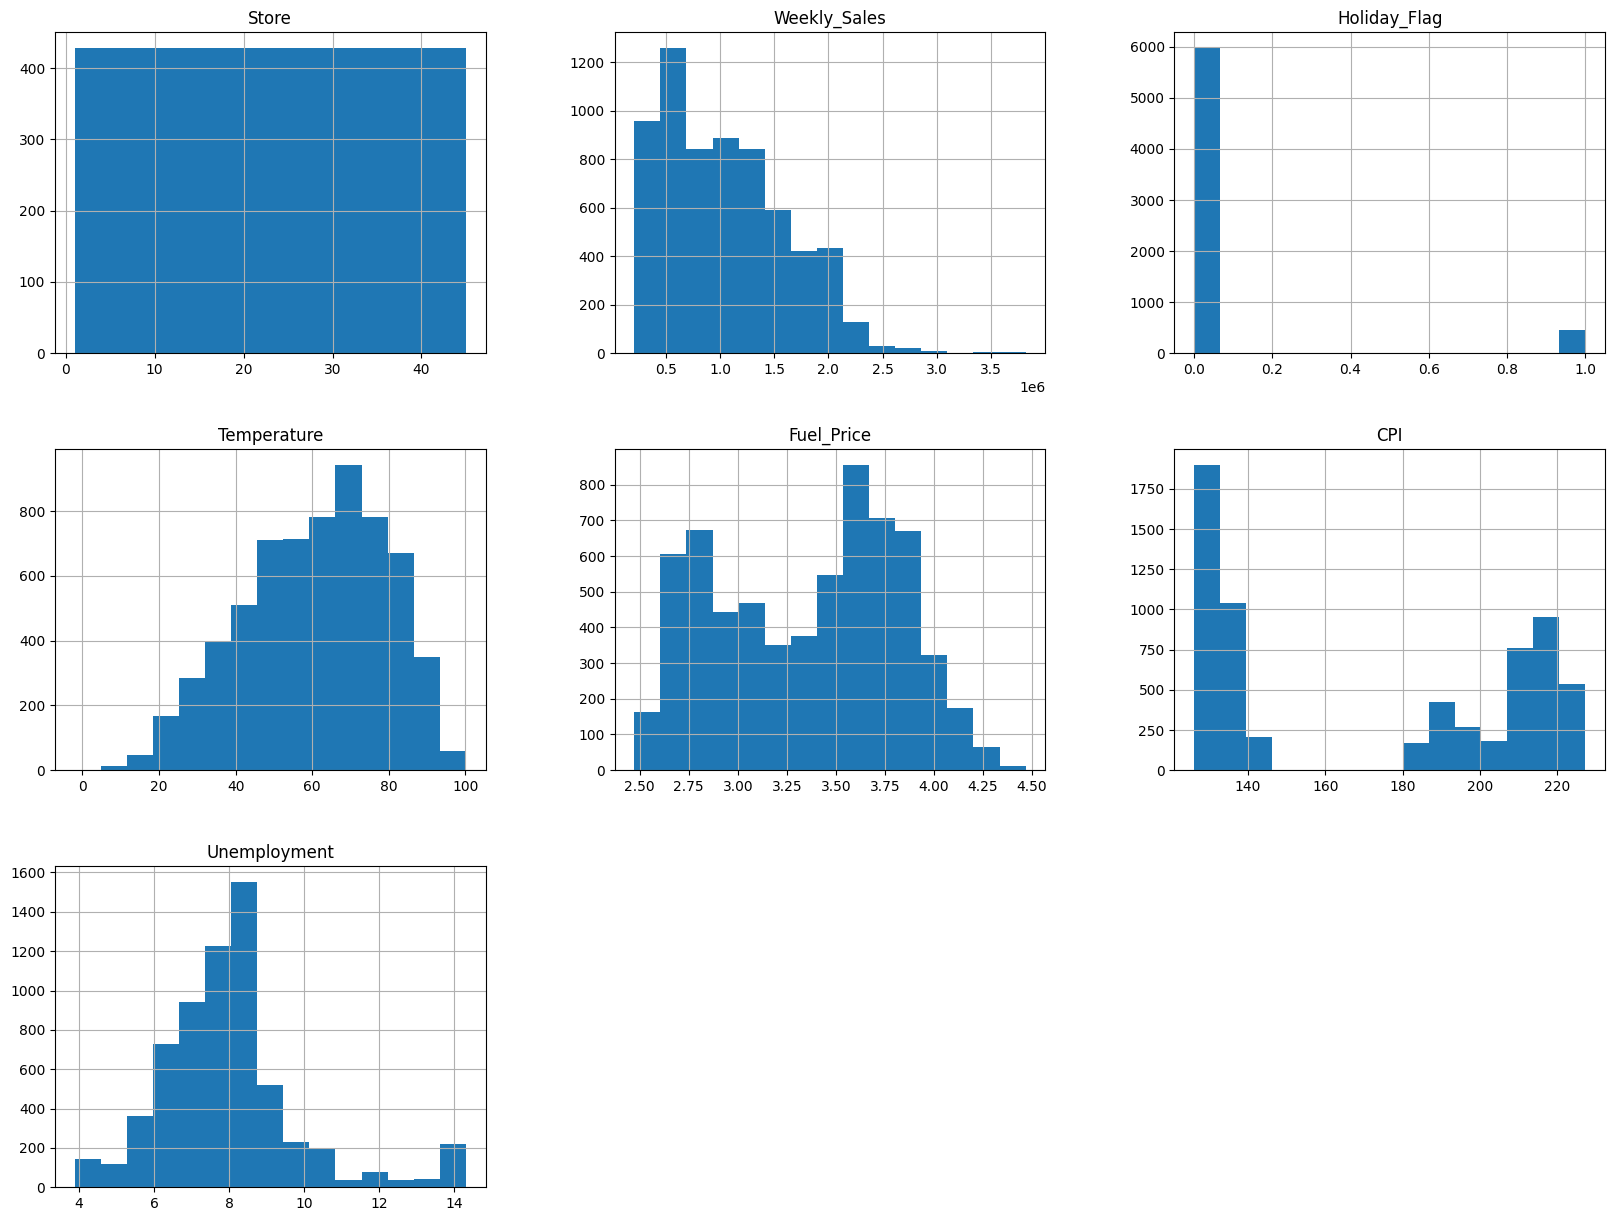

In [6]:
# Generate histograms for numerical columns in the dataset
dataset.hist(figsize=(20,15),bins=15)
plt.savefig(f'histograms.png', bbox_inches='tight')
plt.show()

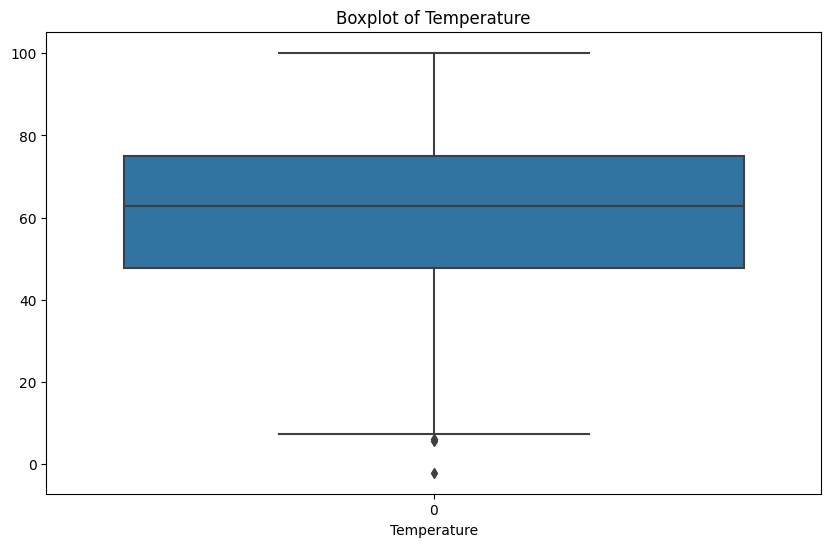

In [30]:
# Create a boxplot for the 'Weekly_Sales' column
plt.figure(figsize=(10, 6))
sns.boxplot(dataset['Temperature'])
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature')

plt.savefig(f'temp_boxplot.png', bbox_inches='tight')
plt.show()

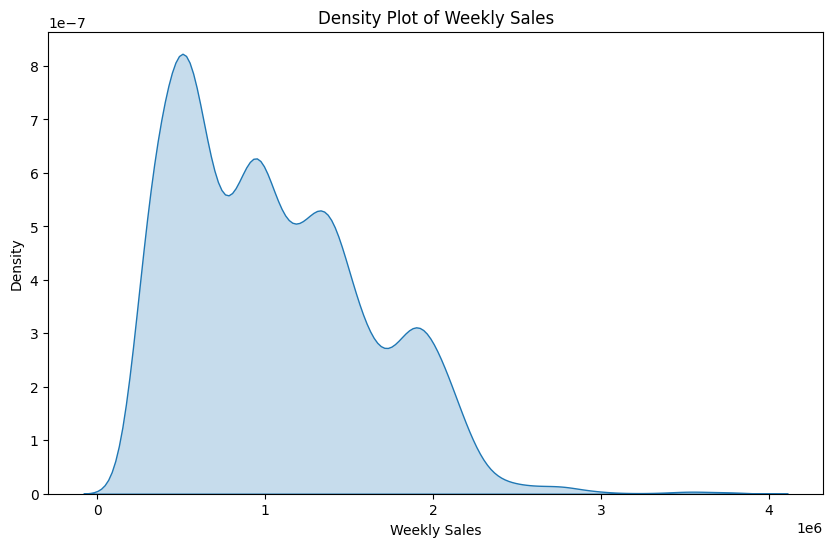

In [8]:
# Density plot (Kernel Density Estimate) for the 'Weekly_Sales' column
plt.figure(figsize=(10, 6))
sns.kdeplot(dataset['Weekly_Sales'], shade=True)
plt.title('Density Plot of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Density')

plt.savefig(f'KDEplot_weeklysales.png', bbox_inches='tight')
plt.show()

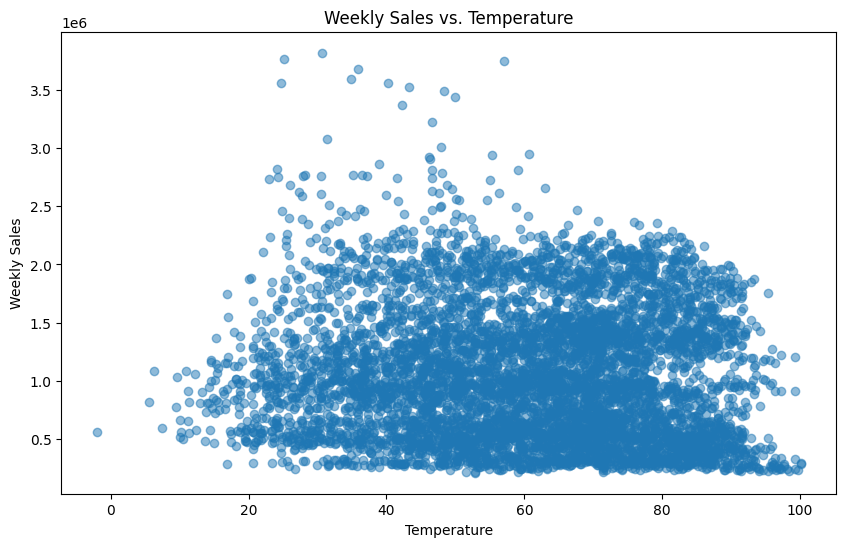

In [9]:
# Scatter plot for Weekly Sales vs. Temperature
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Temperature'], dataset['Weekly_Sales'], alpha=0.5)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')

plt.savefig(f'ScatterPLot_sales_temp.png', bbox_inches='tight')
plt.show()

In [10]:
# Creating a compact data to just include stores and the weekly sales grouped to gether by taking the mean of the sames of each store
datacomp = dataset.groupby('Store')['Weekly_Sales'].mean().to_frame().reset_index()
datacomp.head()

,Store,Weekly_Sales
0,1,1.555264e+06
1,2,1.925751e+06
2,3,4.027044e+05
3,4,2.094713e+06
4,5,3.180118e+05


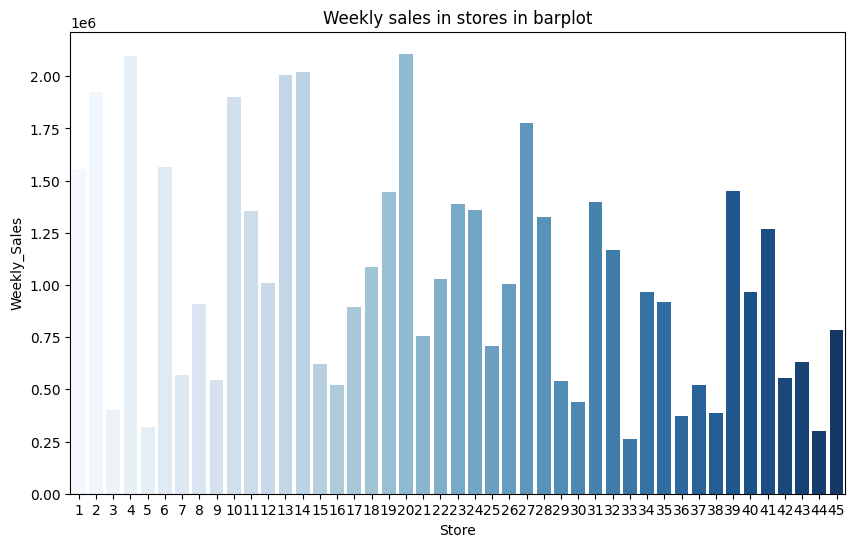

In [11]:
# Create a bar plot for that compact data
fig, ax = plt.subplots(figsize=(10, 6))
 
sns.barplot(x='Store', y='Weekly_Sales', data=datacomp, palette='Blues', ax=ax)
plt.title('Weekly sales in stores in barplot')


plt.savefig(f'Sales_Stores_Barplot.png', bbox_inches='tight')
plt.show()

In [12]:
# Creating another derived data between dates and the weekly sales in it grouped together 
datapie = dataset[dataset['Holiday_Flag'] == 1].groupby('Date')['Weekly_Sales'].mean().to_frame().reset_index()
datapie['Date'] = pd.to_datetime(datapie['Date'], dayfirst=True)
datapie

,Date,Weekly_Sales
0,2012-09-07,1.074001e+06
1,2011-09-09,1.039183e+06
2,2012-02-10,1.111320e+06
3,2010-09-10,1.014098e+06
4,2011-02-11,1.051915e+06
5,2010-02-12,1.074148e+06
6,2011-11-25,1.479858e+06
7,2010-11-26,1.462689e+06
8,2011-12-30,1.023166e+06
9,2010-12-31,8.985004e+05


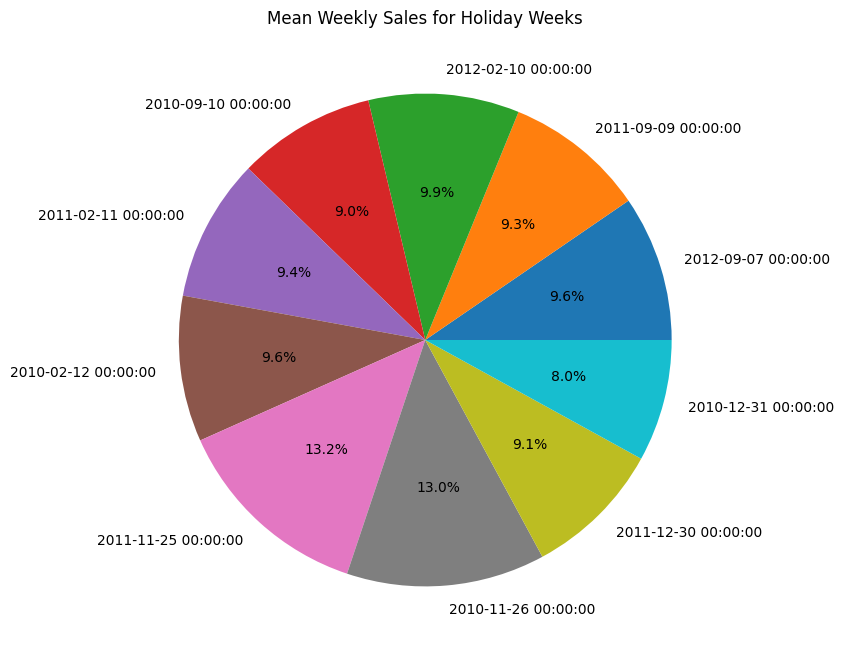

In [13]:
# Create the pie chart for each unique date by its mean sales
plt.figure(figsize=(8, 8))
plt.pie(datapie['Weekly_Sales'], labels=datapie['Date'], autopct='%1.1f%%')
plt.title('Mean Weekly Sales for Holiday Weeks')

plt.savefig(f'Sales_holidays_piechart.png', bbox_inches='tight')
plt.show()

# Performing data cleaning

In [14]:
# Convert the 'Date' column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'], dayfirst=True)
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [15]:
# Displaying the data types of each column after 'Date' edit
dataset.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [16]:
# Getting the number of duplicated rows in the data, which is zero that means that the data has no duplicates 
dataset.duplicated().sum()

0

In [17]:
# CHecking if there is any null values in the data, and turnes out there is non
dataset.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [18]:
#Removing outliers from 'Weekly_Sales' column using z-score
z_scores = stats.zscore(dataset['Weekly_Sales'])
dataset = dataset[(z_scores < 3)]

In [19]:
#Renaming columns
dataset.rename(columns={'Weekly_Sales': 'WeeklySales', 'Holiday_Flag': 'HolidayFlag', 'Fuel_Price': 'FuelPrice'}, inplace=True)

In [20]:
# Checking on the data after cleaning
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6404 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6404 non-null   int64         
 1   Date          6404 non-null   datetime64[ns]
 2   WeeklySales   6404 non-null   float64       
 3   HolidayFlag   6404 non-null   int64         
 4   Temperature   6404 non-null   float64       
 5   FuelPrice     6404 non-null   float64       
 6   CPI           6404 non-null   float64       
 7   Unemployment  6404 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 450.3 KB


# Questions

Which store has maximum sales?
- 

. Getting the maximum cell in the 'WeeklySales' column

. Extracting its row

. Printing the value in the 'Store' column as a int value

In [21]:
# Find the store with maximum sales
max_sales_store = dataset.loc[dataset['WeeklySales'].idxmax()]

# Extract the store number
store_with_max_sales = max_sales_store['Store']

print("Store with maximum sales:", int(store_with_max_sales))

Store with maximum sales: 27


Which store has maximum standard deviation i.e., the sales vary a lot
- 

. Calculating the std dev values of each store grouped by its weekly sales

. Finding the std dev with the maximum value 

. Extracting the store number and printing it 

In [22]:
# Calculate the standard deviation of weekly sales for each store
std_dev_sales = dataset.groupby('Store')['WeeklySales'].std().to_frame().reset_index()

# Find the store with maximum standard deviation
max_std_dev_store = std_dev_sales.loc[std_dev_sales['WeeklySales'].idxmax()]

# Extract the store number
store_with_max_std_dev = max_std_dev_store['Store']

print("Store with maximum standard deviation: {}, with value of: {}".format(int(store_with_max_std_dev),max_std_dev_store[1]))

Store with maximum standard deviation: 23, with value of: 249788.03806798684


Some holidays have a negative impact on sales. Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together.
- 

. Selecting just the weeks that dont have holidays in it and taking the mean of its sales

. Making an empty list that will contain the holidays that have sales more than the mean sales for non-holiday weeks

. Printing the holidays in the previus list and null if not in the list

In [23]:
#Calculate the mean sales for non-holiday weeks
mean_non_holiday_sales = dataset[dataset['HolidayFlag'] == 0]['WeeklySales'].mean()

chosen_holidays=[]
c=1
#For loop to go through the holidays and compare it to the mean sales for non-holiday weeks
for holiday_sales in datapie['Weekly_Sales']:
    if(holiday_sales>mean_non_holiday_sales):
        holiday_high_sales = datapie[datapie['Weekly_Sales']==holiday_sales]
        holiday_date = holiday_high_sales['Date'].iloc[0].strftime('%Y-%m-%d')
        print('Date',c,' : ',holiday_date)
        chosen_holidays.append(holiday_date)
        c+=1
    else:
        print('null')

Date 1  :  2012-09-07
Date 2  :  2011-09-09
Date 3  :  2012-02-10
null
Date 4  :  2011-02-11
Date 5  :  2010-02-12
Date 6  :  2011-11-25
Date 7  :  2010-11-26
null
null


. Constructing a dictionary that will contain the holidays names as the title and the dates as values 

. Printing just the names of holidays that required

In [24]:
holiday_names = {
    'Super Bowl': ['2010-02-12', '2011-02-11', '2012-02-10'],
    'Labour Day': ['2010-09-10', '2011-09-09', '2012-09-07'],
    'Thanksgiving': ['2010-11-26', '2011-11-25', '2012-11-23'],
    'Christmas': ['2010-12-31', '2011-12-30', '2012-12-28']
}
holiday_yn=[False, False, False, False]
for date in chosen_holidays:
    for index, (holiday, dates) in enumerate(holiday_names.items()):
        if date in dates:
            holiday_yn[index]=True
            break

print('The holidays that have higher sales than the mean sales in the non-holiday season:')
for index, (holiday, dates) in enumerate(holiday_names.items()):
    if holiday_yn[index]:
        print(holiday)

The holidays that have higher sales than the mean sales in the non-holiday season:
Super Bowl
Labour Day
Thanksgiving


Provide a monthly and semester view of sales in units and give insights.
- 

. Making 2 new columns in the data which are month and semester as required 

In [25]:
# Extract month and semester information
dataset['Month'] = dataset['Date'].dt.month
dataset['Semester'] = np.where(dataset['Month'] <= 6, 'Semester 1', 'Semester 2')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6404 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6404 non-null   int64         
 1   Date          6404 non-null   datetime64[ns]
 2   WeeklySales   6404 non-null   float64       
 3   HolidayFlag   6404 non-null   int64         
 4   Temperature   6404 non-null   float64       
 5   FuelPrice     6404 non-null   float64       
 6   CPI           6404 non-null   float64       
 7   Unemployment  6404 non-null   float64       
 8   Month         6404 non-null   int32         
 9   Semester      6404 non-null   object        
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object(1)
memory usage: 783.4+ KB


. Getting the aggregated values of weekly sales for each new columns and printing them

In [26]:
# Aggregate sales data by month and semester
monthly_sales = dataset.groupby('Month')['WeeklySales'].sum()
semesterly_sales = dataset.groupby('Semester')['WeeklySales'].sum()

print(monthly_sales,'\n\n')
print(semesterly_sales)

Month
1     3.325984e+08
2     5.687279e+08
3     5.927859e+08
4     6.468598e+08
5     5.571256e+08
6     6.226299e+08
7     6.500010e+08
8     6.130902e+08
9     5.787612e+08
10    5.847848e+08
11    3.870613e+08
12    5.060454e+08
Name: WeeklySales, dtype: float64 


Semester
Semester 1    3.320727e+09
Semester 2    3.319744e+09
Name: WeeklySales, dtype: float64


. Plotting them using bar plot 

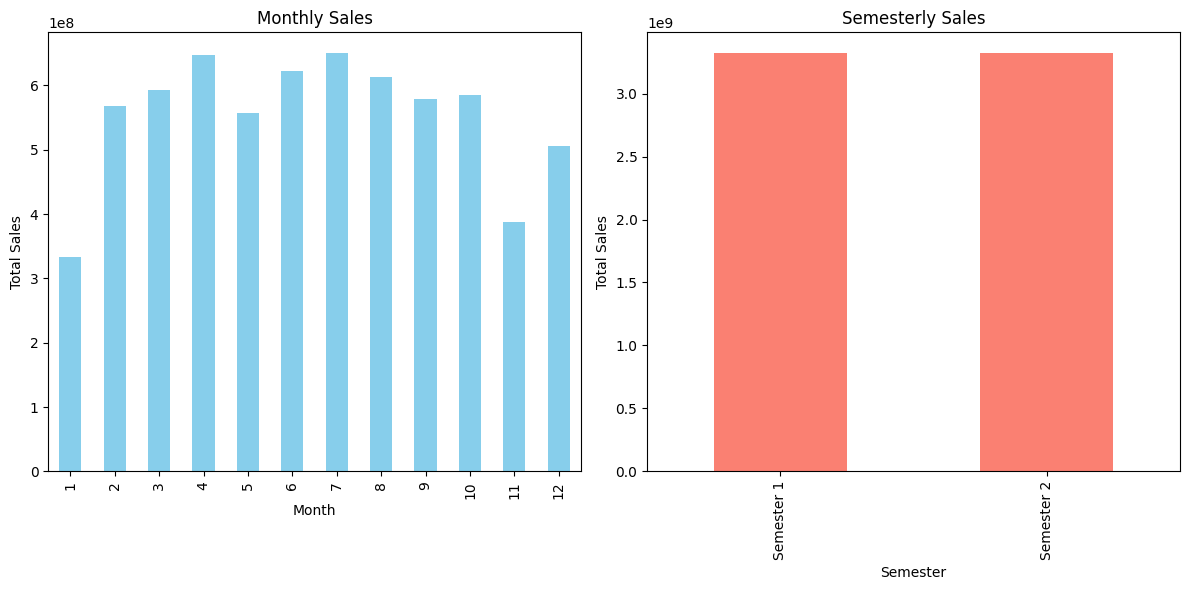

In [27]:
# Plotting the sales trends
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.subplot(1, 2, 2)
semesterly_sales.plot(kind='bar', color='salmon')
plt.title('Semesterly Sales')
plt.xlabel('Semester')
plt.ylabel('Total Sales')

plt.savefig(f'sales_trends.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

Plot the relations between weekly sales vs. other numeric features and give insights.
-

.  Ploting them using normal barplot but realizing it has lots of bins which make it hard to visualize

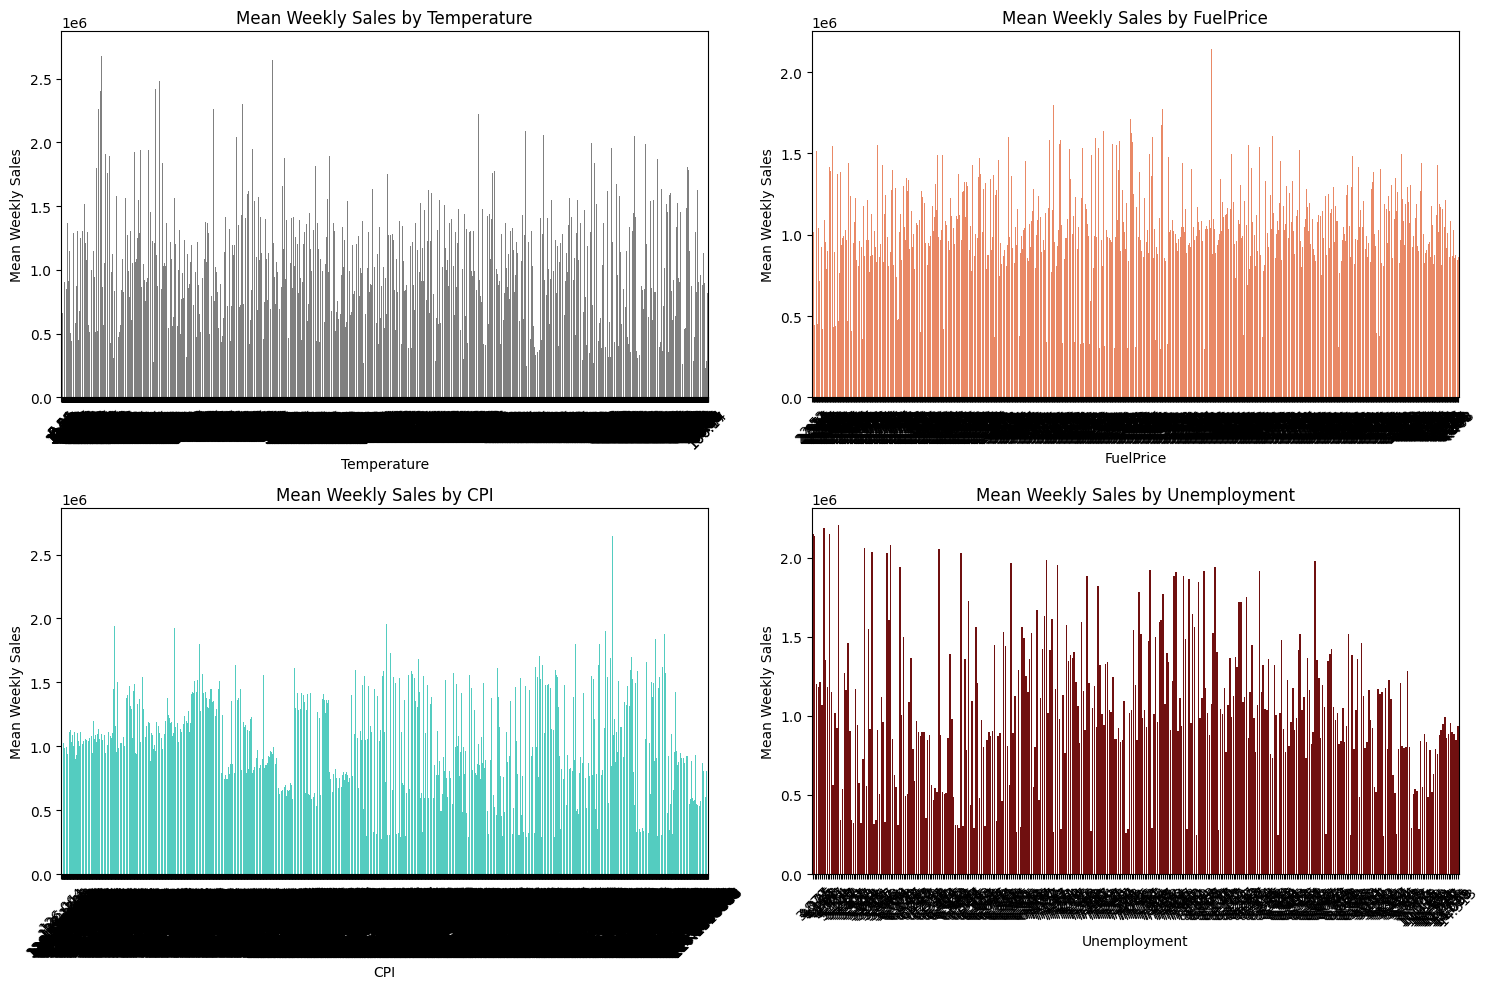

In [28]:
# Define numeric features to analyze
numeric_features = ['Temperature', 'FuelPrice', 'CPI', 'Unemployment']
colors = ['Grey', 'Coral', 'Turquoise', 'Maroon']

# Create subplots for all numeric features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten axes for easier iteration
axes = axes.flatten()

# Create bar plots for each numeric feature against weekly sales
for i, (feature, color) in enumerate(zip(numeric_features, colors)):
    # Aggregate data by numeric feature and calculate mean weekly sales
    data_agg = dataset.groupby(feature)['WeeklySales'].mean().reset_index()
    
    # Create bar plot
    sns.barplot(x=feature, y='WeeklySales', data=data_agg, color=color, ax=axes[i])
    axes[i].set_title(f'Mean Weekly Sales by {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Mean Weekly Sales')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Save the plot as an image
plt.savefig('all_numeric_features_barplots.png', bbox_inches='tight')

plt.show()

.  Dedicating the number of bins to 20

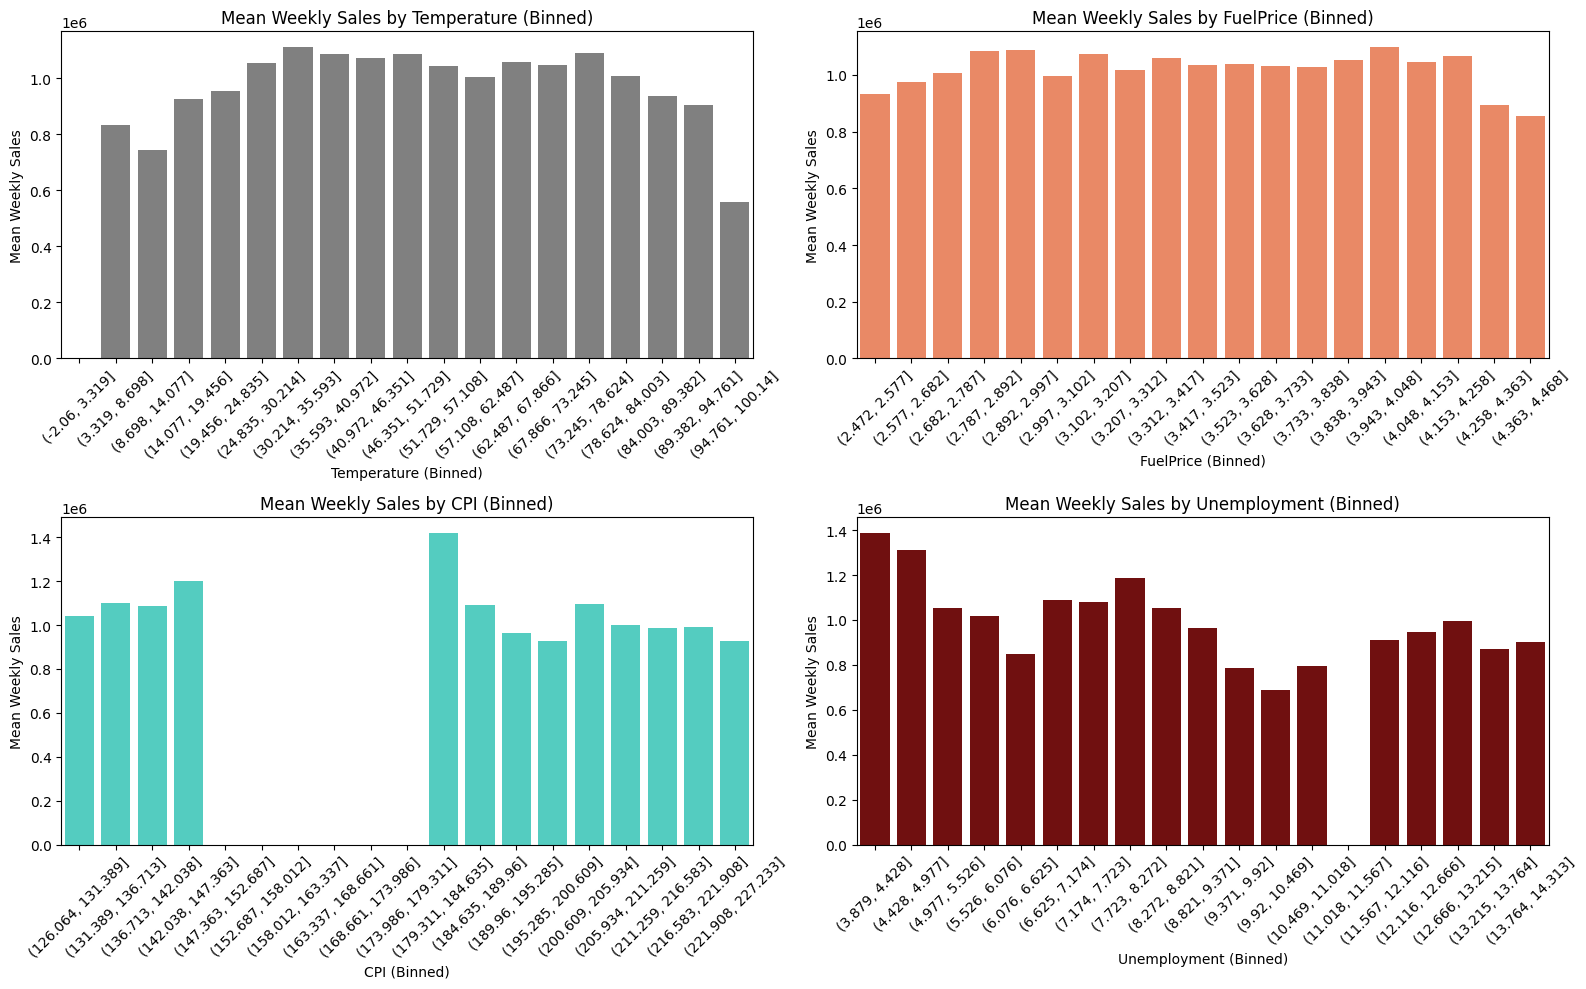

In [29]:
# Define numeric features to analyze
numeric_features = ['Temperature', 'FuelPrice', 'CPI', 'Unemployment']
colors = ['Grey', 'Coral', 'Turquoise', 'Maroon']

# Define number of bins for each numeric feature
num_bins = 20  # Adjust the number of bins

# Create subplots for all numeric features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Flatten axes for easier iteration
axes = axes.flatten()

# Create bar plots for each numeric feature against weekly sales with binning
for i, (feature, color) in enumerate(zip(numeric_features, colors)):
    # Create bins for the numeric feature
    bins = np.linspace(dataset[feature].min(), dataset[feature].max(), num_bins)
    
    # Bin the data
    dataset[f'{feature}_bin'] = pd.cut(dataset[feature], bins=bins)
    
    # Aggregate data by binned feature and calculate mean weekly sales
    data_agg = dataset.groupby(f'{feature}_bin')['WeeklySales'].mean().reset_index()
    
    # Create bar plot with specified color
    sns.barplot(x=f'{feature}_bin', y='WeeklySales', data=data_agg, color=color, ax=axes[i])
    axes[i].set_title(f'Mean Weekly Sales by {feature} (Binned)')
    axes[i].set_xlabel(f'{feature} (Binned)')
    axes[i].set_ylabel('Mean Weekly Sales')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Save the plot as an image
plt.savefig('all_numeric_features_barplots_binned.png', bbox_inches='tight')

plt.show()